In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout
from keras import Sequential
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
import math
import random

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train = x_train.reshape(np.shape(x_train)[0],28*28)
x_test = x_test.reshape(np.shape(x_test)[0],28*28)

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
model = Sequential()
model.add(Dense(10,input_shape=(784,),activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 882us/step - loss: 0.7091 - accuracy: 0.8185
Epoch 2/5
1875/1875 [==============================] - 2s 833us/step - loss: 0.3106 - accuracy: 0.9137
Epoch 3/5
1875/1875 [==============================] - 2s 972us/step - loss: 0.2829 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 906us/step - loss: 0.2717 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 875us/step - loss: 0.2670 - accuracy: 0.9265


In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 708us/step - loss: 0.2675 - accuracy: 0.9252


[0.26753607392311096, 0.9251999855041504]

In [9]:
y_predicted = model.predict(x_test)

In [10]:
y_predicted[0]

array([3.9777815e-02, 3.1024524e-07, 8.6972654e-02, 9.6306109e-01,
       2.9062331e-03, 1.0747275e-01, 1.9569356e-06, 9.9985170e-01,
       1.3636324e-01, 7.4652201e-01], dtype=float32)

In [11]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:4]

[7, 2, 1, 0]

In [12]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

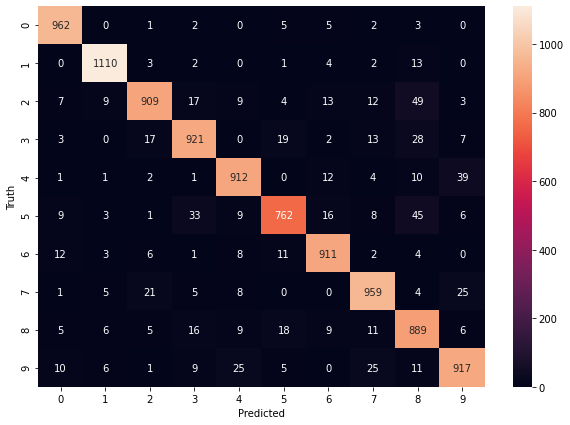

In [13]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Without flat the array keras will do flat the array

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4608 - accuracy: 0.8707
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1335 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0832 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0636 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0485 - accuracy: 0.9854


In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 974us/step - loss: 0.0733 - accuracy: 0.9770


[0.0732768103480339, 0.9769999980926514]

Text(69.0, 0.5, 'Truth')

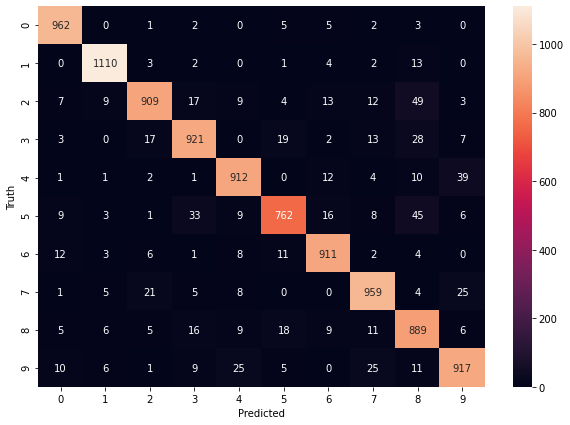

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Logistic Regression Model

In [18]:
df =  pd.read_csv('insurance.csv')

In [19]:
df.age = df.age/100

In [20]:
x_train,x_test,y_train,y_test = train_test_split(df[['age','affordbility']],df.bought_insurance,test_size=0.2,random_state=10)

In [21]:
model = Sequential()
model.add(Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(x_train,y_train,epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 430ms/step - loss: 0.6239 - accuracy: 0.5714
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 0.5714
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6234 - accuracy: 0.5714
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.5714
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.5714
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6227 - accuracy: 0.5714
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6224 - accuracy: 0.5714
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.5714
Epoch 9/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6219 - accuracy: 0.5714
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.5714
Epoch 11/5000
1/1

Epoch 83/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6066 - accuracy: 0.5714
Epoch 84/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.5714
Epoch 85/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.5714
Epoch 86/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6061 - accuracy: 0.5714
Epoch 87/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6059 - accuracy: 0.5714
Epoch 88/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.5714
Epoch 89/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6056 - accuracy: 0.5714
Epoch 90/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6054 - accuracy: 0.5714
Epoch 91/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.5714
Epoch 92/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6051 - accuracy: 0.5714
Epoch 93/5

1/1 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.5714
Epoch 166/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.5714
Epoch 167/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.5714
Epoch 168/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.5714
Epoch 169/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.5714
Epoch 170/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5950 - accuracy: 0.5714
Epoch 171/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.5714
Epoch 172/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5948 - accuracy: 0.5714
Epoch 173/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.5714
Epoch 174/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.5714
Epoch 175/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.5714
Epoch 248/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.5714
Epoch 249/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.5714
Epoch 250/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.5714
Epoch 251/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5879 - accuracy: 0.5714
Epoch 252/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5878 - accuracy: 0.5714
Epoch 253/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.5714
Epoch 254/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.5714
Epoch 255/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.5714
Epoch 256/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.5714
Epoch 257/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.6667
Epoch 330/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.6667
Epoch 331/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5821 - accuracy: 0.6667
Epoch 332/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.6667
Epoch 333/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.6667
Epoch 334/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.6667
Epoch 335/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5818 - accuracy: 0.6667
Epoch 336/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.6667
Epoch 337/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.6667
Epoch 338/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5816 - accuracy: 0.6667
Epoch 339/5000


1/1 [==============================] - 0s 4ms/step - loss: 0.5709 - accuracy: 0.6667
Epoch 492/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.6667
Epoch 493/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.6667
Epoch 494/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5707 - accuracy: 0.6667
Epoch 495/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5706 - accuracy: 0.6667
Epoch 496/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.6667
Epoch 497/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5704 - accuracy: 0.6667
Epoch 498/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.6667
Epoch 499/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.6667
Epoch 500/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.6667
Epoch 501/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.5651 - accuracy: 0.6667
Epoch 574/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5650 - accuracy: 0.6667
Epoch 575/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5650 - accuracy: 0.6667
Epoch 576/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.6667
Epoch 577/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5648 - accuracy: 0.6667
Epoch 578/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5647 - accuracy: 0.6667
Epoch 579/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5647 - accuracy: 0.6667
Epoch 580/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5646 - accuracy: 0.6667
Epoch 581/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.6667
Epoch 582/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.6667
Epoch 583/5000


1/1 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.6667
Epoch 656/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.6667
Epoch 657/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5592 - accuracy: 0.6667
Epoch 658/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.6667
Epoch 659/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.6667
Epoch 660/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.6667
Epoch 661/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.6667
Epoch 662/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.6667
Epoch 663/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.6667
Epoch 664/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.6667
Epoch 665/5000


1/1 [==============================] - 0s 5ms/step - loss: 0.5537 - accuracy: 0.6667
Epoch 738/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.6667
Epoch 739/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.6667
Epoch 740/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5535 - accuracy: 0.6667
Epoch 741/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.6667
Epoch 742/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.6667
Epoch 743/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.6667
Epoch 744/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5532 - accuracy: 0.6667
Epoch 745/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5531 - accuracy: 0.6667
Epoch 746/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5531 - accuracy: 0.6667
Epoch 747/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7143
Epoch 820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7143
Epoch 821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5479 - accuracy: 0.7143
Epoch 822/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.7143
Epoch 823/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5478 - accuracy: 0.7143
Epoch 824/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.7143
Epoch 825/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.7143
Epoch 826/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.7143
Epoch 827/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5475 - accuracy: 0.7143
Epoch 828/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.7143
Epoch 829/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7619
Epoch 983/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7619
Epoch 984/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7619
Epoch 985/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7619
Epoch 986/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7619
Epoch 987/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.7619
Epoch 988/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7619
Epoch 989/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7619
Epoch 990/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7619
Epoch 991/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.7619
Epoch 992/5000


1/1 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.7619
Epoch 1145/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7619
Epoch 1146/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7619
Epoch 1147/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7619
Epoch 1148/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5266 - accuracy: 0.7619
Epoch 1149/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7619
Epoch 1150/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5265 - accuracy: 0.7619
Epoch 1151/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.7619
Epoch 1152/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.7619
Epoch 1153/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5263 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.7619
Epoch 1306/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.7619
Epoch 1307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.7619
Epoch 1308/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.7619
Epoch 1309/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.7619
Epoch 1310/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.7619
Epoch 1311/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5166 - accuracy: 0.7619
Epoch 1312/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.7619
Epoch 1313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7619
Epoch 1314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7619
Epoch 1467/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5075 - accuracy: 0.7619
Epoch 1468/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.7619
Epoch 1469/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.7619
Epoch 1470/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5074 - accuracy: 0.7619
Epoch 1471/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.7619
Epoch 1472/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7619
Epoch 1473/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.7619
Epoch 1474/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.7619
Epoch 1475/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7619
Epoch 1628/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7619
Epoch 1629/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4985 - accuracy: 0.7619
Epoch 1630/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4985 - accuracy: 0.7619
Epoch 1631/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.4984 - accuracy: 0.7619
Epoch 1632/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.7619
Epoch 1633/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.7619
Epoch 1634/5000
1/1 [==============================] - ETA: 0s - loss: 0.4982 - accuracy: 0.76 - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7619
Epoch 1635/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7619
Epoch 1636/5000
1/1 [==============================] - 0s 4ms/st

1/1 [==============================] - 0s 4ms/step - loss: 0.4901 - accuracy: 0.7619
Epoch 1788/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.7619
Epoch 1789/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.7619
Epoch 1790/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.7619
Epoch 1791/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7619
Epoch 1792/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7619
Epoch 1793/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7619
Epoch 1794/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7619
Epoch 1795/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.7619
Epoch 1796/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7619
Epoch 1948/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7619
Epoch 1949/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7619
Epoch 1950/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7619
Epoch 1951/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4819 - accuracy: 0.7619
Epoch 1952/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7619
Epoch 1953/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7619
Epoch 1954/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7619
Epoch 1955/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7619
Epoch 1956/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7619
Epoch 2109/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7619
Epoch 2110/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7619
Epoch 2111/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7619
Epoch 2112/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7619
Epoch 2113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7619
Epoch 2114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7619
Epoch 2115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7619
Epoch 2116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7619
Epoch 2117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7619
Epoch 2269/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4671 - accuracy: 0.7619
Epoch 2270/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7619
Epoch 2271/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7619
Epoch 2272/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4669 - accuracy: 0.7619
Epoch 2273/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7619
Epoch 2274/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7619
Epoch 2275/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7619
Epoch 2276/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4668 - accuracy: 0.7619
Epoch 2277/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7619
Epoch 2429/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.7619
Epoch 2430/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7619
Epoch 2431/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.7619
Epoch 2432/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4600 - accuracy: 0.7619
Epoch 2433/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7619
Epoch 2434/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.7619
Epoch 2435/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.7619
Epoch 2436/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4599 - accuracy: 0.7619
Epoch 2437/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4598 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7619
Epoch 2590/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4536 - accuracy: 0.7619
Epoch 2591/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.7619
Epoch 2592/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4535 - accuracy: 0.7619
Epoch 2593/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.7619
Epoch 2594/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.7619
Epoch 2595/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.7619
Epoch 2596/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.7619
Epoch 2597/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.7619
Epoch 2598/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4533 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.7619
Epoch 2752/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.7619
Epoch 2753/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.7619
Epoch 2754/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.7619
Epoch 2755/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.7619
Epoch 2756/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.7619
Epoch 2757/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.7619
Epoch 2758/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.7619
Epoch 2759/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.7619
Epoch 2760/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.7619
Epoch 2912/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.7619
Epoch 2913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7619
Epoch 2914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7619
Epoch 2915/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4413 - accuracy: 0.7619
Epoch 2916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.7619
Epoch 2917/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4412 - accuracy: 0.7619
Epoch 2918/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4412 - accuracy: 0.7619
Epoch 2919/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4411 - accuracy: 0.7619
Epoch 2920/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4411 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4357 - accuracy: 0.7619
Epoch 3074/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4357 - accuracy: 0.7619
Epoch 3075/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4357 - accuracy: 0.7619
Epoch 3076/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4356 - accuracy: 0.7619
Epoch 3077/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.7619
Epoch 3078/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.7619
Epoch 3079/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.7619
Epoch 3080/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.7619
Epoch 3081/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.7619
Epoch 3082/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4354 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.7619
Epoch 3236/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4303 - accuracy: 0.7619
Epoch 3237/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4303 - accuracy: 0.7619
Epoch 3238/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.7619
Epoch 3239/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 0.7619
Epoch 3240/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 0.7619
Epoch 3241/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 0.7619
Epoch 3242/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.7619
Epoch 3243/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4301 - accuracy: 0.7619
Epoch 3244/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4252 - accuracy: 0.7619
Epoch 3398/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.7619
Epoch 3399/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.7619
Epoch 3400/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.7619
Epoch 3401/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.7619
Epoch 3402/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.7619
Epoch 3403/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.7619
Epoch 3404/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7619
Epoch 3405/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7619
Epoch 3406/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.7619
Epoch 3560/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.7619
Epoch 3561/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.7619
Epoch 3562/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4203 - accuracy: 0.7619
Epoch 3563/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4203 - accuracy: 0.7619
Epoch 3564/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4202 - accuracy: 0.7619
Epoch 3565/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.7619
Epoch 3566/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.7619
Epoch 3567/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7619
Epoch 3568/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 0.7619
Epoch 3722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.7619
Epoch 3723/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4157 - accuracy: 0.7619
Epoch 3724/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.7619
Epoch 3725/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.7619
Epoch 3726/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.7619
Epoch 3727/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.7619
Epoch 3728/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4156 - accuracy: 0.7619
Epoch 3729/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4155 - accuracy: 0.7619
Epoch 3730/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.7619
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.8571
Epoch 3883/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8571
Epoch 3884/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8571
Epoch 3885/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8571
Epoch 3886/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8571
Epoch 3887/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8571
Epoch 3888/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8571
Epoch 3889/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8571
Epoch 3890/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8571
Epoch 3891/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8571
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8571
Epoch 4045/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 0.8571
Epoch 4046/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4072 - accuracy: 0.8571
Epoch 4047/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 0.8571
Epoch 4048/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4071 - accuracy: 0.8571
Epoch 4049/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8571
Epoch 4050/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8571
Epoch 4051/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4071 - accuracy: 0.8571
Epoch 4052/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8571
Epoch 4053/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8571
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8571
Epoch 4206/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8571
Epoch 4207/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4032 - accuracy: 0.8571
Epoch 4208/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4032 - accuracy: 0.8571
Epoch 4209/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4032 - accuracy: 0.8571
Epoch 4210/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4032 - accuracy: 0.8571
Epoch 4211/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.8571
Epoch 4212/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8571
Epoch 4213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8571
Epoch 4214/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.8571
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8571
Epoch 4367/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3995 - accuracy: 0.8571
Epoch 4368/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8571
Epoch 4369/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3995 - accuracy: 0.8571
Epoch 4370/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8571
Epoch 4371/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8571
Epoch 4372/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3994 - accuracy: 0.8571
Epoch 4373/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.8571
Epoch 4374/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8571
Epoch 4375/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.8571
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8571
Epoch 4528/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8571
Epoch 4529/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3959 - accuracy: 0.8571
Epoch 4530/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8571
Epoch 4531/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3959 - accuracy: 0.8571
Epoch 4532/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3959 - accuracy: 0.8571
Epoch 4533/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3958 - accuracy: 0.8571
Epoch 4534/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8571
Epoch 4535/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3958 - accuracy: 0.9048
Epoch 4536/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3958 - accuracy: 0.9048
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.9048
Epoch 4688/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3926 - accuracy: 0.9048
Epoch 4689/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.9048
Epoch 4690/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.9048
Epoch 4691/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.9048
Epoch 4692/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.9048
Epoch 4693/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.9048
Epoch 4694/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3925 - accuracy: 0.9048
Epoch 4695/5000
1/1 [==============================] - ETA: 0s - loss: 0.3924 - accuracy: 0.90 - 0s 4ms/step - loss: 0.3924 - accuracy: 0.9048
Epoch 4696/5000
1/1 [==============================] - 0s 3ms/ste

1/1 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.9048
Epoch 4848/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3894 - accuracy: 0.9048
Epoch 4849/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.9048
Epoch 4850/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.9048
Epoch 4851/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.9048
Epoch 4852/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.9048
Epoch 4853/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.9048
Epoch 4854/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.9048
Epoch 4855/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.9048
Epoch 4856/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.9048
Epoch 

In [23]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 178ms/step - loss: 0.3449 - accuracy: 0.6667


[0.34492167830467224, 0.6666666865348816]

In [24]:
weight,bias = model.get_weights()
print(weight,bias)

[[5.619112 ]
 [2.1599498]] [-3.4171162]


# My Neural Network using python

In [25]:
def sigmoid(y):
    return 1/(1+math.exp(-y))

def prediction_function(age, affordibility,w1,w2,bias):
    weighted_sum = w1*age + w2*affordibility + bias
    return sigmoid_numpy(weighted_sum)


def log_loss(y_true,y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

def sigmoid_numpy(X):
    return 1/(1+np.exp(-X))


def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [26]:
w1,w2,bias = gradient_descent(x_train['age'],x_train['affordbility'],y_train,5000, 0.386501)

Epoch:0, w1:0.9856109292212214, w2:0.9740839826332178, bias:-0.08591117809786131, loss:0.6239307090132188
Epoch:1, w1:0.9751855543988454, w2:0.9549612104752769, bias:-0.16186932715390268, loss:0.6084900664358016
Epoch:2, w1:0.9683099527067981, w2:0.9419386988242853, bias:-0.2289300604768261, loss:0.596825626080806
Epoch:3, w1:0.9645492216444557, w2:0.9342613839455947, bias:-0.28818782136990884, loss:0.5880085668423073
Epoch:4, w1:0.9634764009656583, w2:0.9311711978751652, bias:-0.34070730572338204, loss:0.5812822256516905
Epoch:5, w1:0.9646921318041183, w2:0.9319486729305086, bias:-0.38747788287407997, loss:0.5760596068479132
Epoch:6, w1:0.9678359023191847, w2:0.9359380207672202, bias:-0.42938840335133255, loss:0.5719024455503451
Epoch:7, w1:0.9725907615602676, w2:0.942559036505989, bias:-0.4672175512860124, loss:0.5684931159629544
Epoch:8, w1:0.978683537671036, w2:0.9513097167966432, bias:-0.501634715957395, loss:0.565606634137338
Epoch:9, w1:0.9858822991887085, w2:0.9617630176802442,

Epoch:83, w1:1.8870783259899, w2:1.7552934222057575, bias:-1.6242756571487094, loss:0.48664774554422296
Epoch:84, w1:1.8996056294127048, w2:1.7613536065515742, bias:-1.6343186855010279, loss:0.4860547413328848
Epoch:85, w1:1.9121264107200637, w2:1.7673291685176749, bias:-1.6442914150122654, loss:0.4854669992835986
Epoch:86, w1:1.9246404529129562, w2:1.773221501106345, bias:-1.6541948228195482, loss:0.48488440761014723
Epoch:87, w1:1.9371475433005165, w2:1.7790319712771374, bias:-1.6640298683922818, loss:0.4843068578834404
Epoch:88, w1:1.9496474734103981, w2:1.7847619204951515, bias:-1.6737974939169082, loss:0.4837342449178748
Epoch:89, w1:1.9621400389015669, w2:1.7904126652675212, bias:-1.6834986246717127, loss:0.4831664666618287
Epoch:90, w1:1.974625039479422, w2:1.7959854976682683, bias:-1.6931341693920205, loss:0.4826034240921353
Epoch:91, w1:1.9871022788131483, w2:1.8014816858516942, bias:-1.7027050206261007, loss:0.4820450211123826
Epoch:92, w1:1.9995715644552132, w2:1.80690247455

Epoch:161, w1:2.832820445263427, w2:2.0517345752855647, bias:-2.2518461311816553, loss:0.4508359277307557
Epoch:162, w1:2.8444228460305623, w2:2.053977184778253, bias:-2.258392601681845, loss:0.4504696800011589
Epoch:163, w1:2.856010173070443, w2:2.0561943928003683, bias:-2.2649115057260163, loss:0.4501050898608356
Epoch:164, w1:2.8675823860428906, w2:2.0583865663362713, bias:-2.2714031233856873, loss:0.44974214192977335
Epoch:165, w1:2.8791394456677755, w2:2.0605540667181232, bias:-2.277867730802119, loss:0.4493808211303655
Epoch:166, w1:2.8906813137082352, w2:2.0626972497241014, bias:-2.2843056002520323, loss:0.4490211126792681
Epoch:167, w1:2.902207952954193, w2:2.064816465674637, bias:-2.2907170002120343, loss:0.4486630020795026
Epoch:168, w1:2.9137193272061643, w2:2.0669120595267256, bias:-2.29710219542178, loss:0.448306475112794
Epoch:169, w1:2.925215401259345, w2:2.0689843709663522, bias:-2.3034614469458994, loss:0.44795151783213866
Epoch:170, w1:2.9366961408879795, w2:2.0710337

Epoch:255, w1:3.854653035778217, w2:2.187611397275852, bias:-2.775068342099998, loss:0.4222083046432686
Epoch:256, w1:3.8647654273821925, w2:2.188531671407684, bias:-2.7798684758267718, loss:0.42195532795548757
Epoch:257, w1:3.8748619872510974, w2:2.189445272012802, bias:-2.78465622314752, loss:0.4217032563746626
Epoch:258, w1:3.884942727800478, w2:2.190352293034611, bias:-2.789431669499533, loss:0.4214520856058893
Epoch:259, w1:3.895007661690665, w2:2.191252827125018, bias:-2.794194899358487, loss:0.4212018113902304
Epoch:260, w1:3.9050568018228056, w2:2.1921469656627752, bias:-2.7989459962513195, loss:0.4209524295041012
Epoch:261, w1:3.915090161334944, w2:2.1930347987715386, bias:-2.8036850427689144, loss:0.42070393575867043
Epoch:262, w1:3.9251077535981596, w2:2.193916415337641, bias:-2.808412120578591, loss:0.4204563259992759
Epoch:263, w1:3.9351095922127555, w2:2.194791903027591, bias:-2.813127310436407, loss:0.4202095961048526
Epoch:264, w1:3.945095691004498, w2:2.195661348305302

Epoch:334, w1:4.606027456352154, w2:2.2455867113750196, bias:-3.121672204261899, loss:0.40471555600744147
Epoch:335, w1:4.614941808986452, w2:2.2461893624320255, bias:-3.1256967328010097, loss:0.4045230214389813
Epoch:336, w1:4.623841816909301, w2:2.246789894429242, bias:-3.1297134482052305, loss:0.40433113064889237
Epoch:337, w1:4.6327275029450625, w2:2.247388338996861, bias:-3.1337223880964014, loss:0.4041398810517612
Epoch:338, w1:4.641598889967792, w2:2.247984727328241, bias:-3.137723589743449, loss:0.4039492700754125
Epoch:339, w1:4.650456000899847, w2:2.248579090185685, bias:-3.1417170900665927, loss:0.40375929516079506
Epoch:340, w1:4.659298858710514, w2:2.2491714579061437, bias:-3.1457029256414937, loss:0.40356995376186894
Epoch:341, w1:4.668127486414657, w2:2.2497618604068377, bias:-3.1496811327033494, loss:0.4033812433454941
Epoch:342, w1:4.676941907071378, w2:2.250350327190805, bias:-3.153651747150933, loss:0.40319316139132305
Epoch:343, w1:4.6857421437827, w2:2.250936887352

Epoch:419, w1:5.314853210088208, w2:2.291646678613348, bias:-3.438982657723224, loss:0.39041676322650737
Epoch:420, w1:5.322632353396638, w2:2.292148528735617, bias:-3.442449513369718, loss:0.39027084388157884
Epoch:421, w1:5.330399162960826, w2:2.292649831333543, bias:-3.4459108184473424, loss:0.39012538733227925
Epoch:422, w1:5.338153662300087, w2:2.2931505956055327, bias:-3.4493665913957607, loss:0.3899803918371743
Epoch:423, w1:5.345895874913225, w2:2.293650830608174, bias:-3.4528168505201764, loss:0.3898358556623917
Epoch:424, w1:5.353625824278121, w2:2.2941505452581064, bias:-3.456261613992762, loss:0.3896917770815822
Epoch:425, w1:5.361343533851326, w2:2.294649748333871, bias:-3.459700899854074, loss:0.3895481543758797
Epoch:426, w1:5.3690490270676525, w2:2.2951484484777387, bias:-3.4631347260144505, loss:0.3894049858338623
Epoch:427, w1:5.376742327339788, w2:2.2956466541975105, bias:-3.46656311025539, loss:0.38926226975151373
Epoch:428, w1:5.384423458057901, w2:2.29614437386829

In [27]:
prediction_function(np.array(x_test.age),np.array(x_test.affordbility),w1,w2,bias)

array([0.44592134, 0.86613761, 0.07701034, 0.10941676, 0.57917024,
       0.1041451 ])

In [28]:
model.predict(x_test)

array([[0.4885898 ],
       [0.86870265],
       [0.08710667],
       [0.12388462],
       [0.57839423],
       [0.11791354]], dtype=float32)

In [29]:
print(w1,w2,bias)

5.528083658350978 2.3055189234923508 -3.5340142904419563


# Stochastic vs Batch gradient descent

In [30]:
df = pd.read_csv('roomprice.csv')

In [31]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()
scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [32]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.50689655, 0.5       ],
       [0.        , 0.        ]])

In [33]:
def batch_gradientDescent(x,y_true,epochs,lr=0.01):
    features = x.shape[1]
    w = np.ones(shape=(features))
    bias = 0
    total_samples = scaled_x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w,x.T)+bias
        w_grad = -(2/total_samples)*np.dot(x.T,(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        w = w - lr*w_grad
        bias = bias - lr*b_grad
        cost = np.mean(np.square(y_true-y_predicted))
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,bias,cost,cost_list,epoch_list 

In [34]:
w,b,cost,cost_list,epoch_list = batch_gradientDescent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)

In [35]:
print(w,b,cost)

[0.72140572 0.67122289] -0.22732930892201805 0.006835638170154654


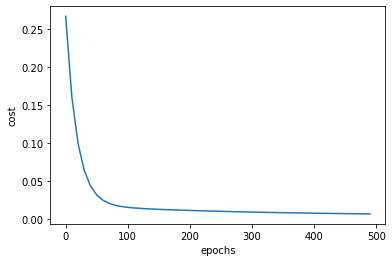

In [36]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [37]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0]+w[1]*scaled_x[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]
    
predict(2300,4,w,b)    

119.64588082995677

In [38]:
def stochastic_gradientDescent(x,y_true,epochs,lr=0.01):
    features = x.shape[1]
    w = np.ones(shape=(features))
    bias = 0
    total_samples = scaled_x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0,(total_samples-1))
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_x.T)+bias
        w_grad = -(2/total_samples)*np.dot(sample_x.T,(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        w = w - lr*w_grad
        bias = bias - lr*b_grad
        cost = np.mean(np.square(sample_y-y_predicted))
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,bias,cost,cost_list,epoch_list 

In [39]:
w,b,cost,cost_list,epoch_list = stochastic_gradientDescent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)

In [40]:
print(w,b,cost)

[0.72183144 0.66972409] -0.23094213954886866 0.010983510569092957


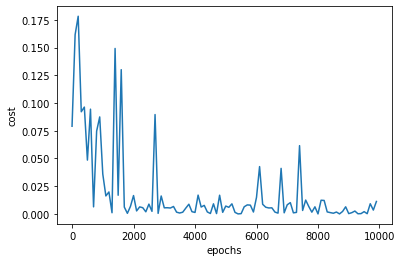

In [41]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

# Tensorboard

In [44]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

tb_callback = keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq=1)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.fit(x_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5


ValueError: in user code:

    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_6 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 2)


# Gpu

In [2]:
tf.test.is_built_with_cuda()

True

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [ ]:
scaled_x_train = x_train/255
scaled_x_test = x_train/255

In [ ]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [ ]:
y_train[0:5]

In [ ]:
y_train_categorical[0:5]

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(3000,activation='relu'))
model.add(Dense(3000,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(scaled_x_train,y_train_categorical,epochs=2)

In [ ]:
def get_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(3000,activation='relu'))
    model.add(Dense(3000,activation='relu'))
    model.add(Dense(10,activation='sigmoid'))

    model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'): #only by using the cpu
    cpu_model = get_model()
    cpu_model.fit(scaled_x_train,y_train_categorical,epochs=1)

In [ ]:
with tf.device('GPU:0'): #Use the gpu only
    gpu_model = get_model()
    gpu_model.fit(scaled_x_train,y_train_categorical,epochs=1)

# Customer churn prediction using ANN

In [46]:
df = pd.read_csv('telecom_customer_churn.csv')

In [47]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
df.drop('customerID',axis='columns',inplace=True)

In [49]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

To convert the 'TotalCharges' column from object to 'float64'[

In [50]:
x = df[df.TotalCharges == ' '] #There is some row which is blank only for the TotalCharges column.We have to drop them first
x.index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [51]:
df.drop(x.index,inplace=True)

In [52]:
tc = pd.to_numeric(df.TotalCharges) #convert object to float value

In [53]:
df.TotalCharges = tc

Tenure : how much the employee is truthful

In [54]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

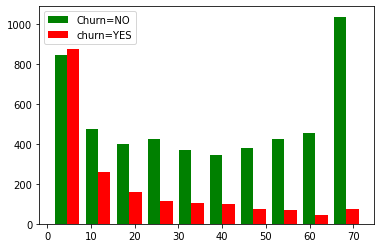

In [55]:
plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=NO','churn=YES'])
plt.legend()

In [56]:
def unique_column_value(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [57]:
unique_column_value(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [58]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [59]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PaperlessBilling','Churn']

In [60]:
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [61]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [62]:
new_df = pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'])

In [63]:
new_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [64]:
new_df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 27 columns]

In [65]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
new_df[cols_to_scale] = scaler.fit_transform(new_df[cols_to_scale])

In [66]:
x = new_df.drop('Churn',axis='columns')
y = new_df.Churn

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [68]:
model = Sequential()
model.add(Dense(20,input_shape=(26,),activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
model.fit(x_train,y_train,epochs=44)

Epoch 1/44
176/176 [==============================] - 1s 960us/step - loss: 0.5431 - accuracy: 0.7457
Epoch 2/44
176/176 [==============================] - 0s 920us/step - loss: 0.4508 - accuracy: 0.7838
Epoch 3/44
176/176 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.7908
Epoch 4/44
176/176 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.7947
Epoch 5/44
176/176 [==============================] - 0s 966us/step - loss: 0.4293 - accuracy: 0.7909
Epoch 6/44
176/176 [==============================] - 0s 983us/step - loss: 0.4235 - accuracy: 0.7941
Epoch 7/44
176/176 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8035
Epoch 8/44
176/176 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.7927
Epoch 9/44
176/176 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.7951
Epoch 10/44
176/176 [==============================] - 0s 989us/step - loss: 0.4151 - accura

In [70]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 837us/step - loss: 0.4107 - accuracy: 0.8159


[0.410704642534256, 0.8159204125404358]

In [71]:
y_predicted = model.predict(x_test)
y_predicted = np.round(y_predicted)

In [72]:
y_predicted[:10]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [73]:
y_test.values[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1032
           1       0.69      0.57      0.62       375

    accuracy                           0.82      1407
   macro avg       0.77      0.74      0.75      1407
weighted avg       0.81      0.82      0.81      1407



Text(69.0, 0.5, 'Truth')

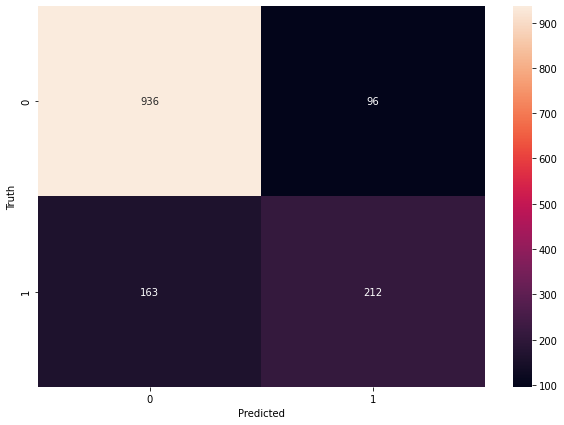

In [75]:
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout Regularization

In [76]:
df = pd.read_csv('sonar_csv.csv',header=None)

In [77]:
df

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54      55      56      57  \
0    0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1    0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2    0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3    0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4    0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
203  0.2684  ...  0.0116  0.0098  0.0199  0.0033  0.0101  0.0065  0.0115   
204  0.2154  ...  0.0061  0.0093  0.0135  0.0063  0.0063  0.0034  0.0032   
205  0.2529  ...  0.0160  0.0029  0.0051  0.0062  0.0089  0.0140  0.0138   
206  0.2354  ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
207  0.2354  ...  0.0146  0.0129  0.0047  0.0039  0.0061  0.0040  0.0036   

         58      59    60  
0    0.0090  0.0032  Rock  
1    0.0052  0.0044  Rock  
2    0.0095  0.0078  Rock  
3    0.0040  0.0117  Rock  
4    0.0107  0.0094  Rock  
..      ...     ...   ...  
203  0.0193  0.0157  Mine  
204  0.0062  0.0067  Mine  
205  0.0077  0.0031  Mine  
206  0.0036  0.0048  Mine  
207  0.0061  0.0115  Mine  

[208 rows x 61 columns]

In [78]:
df[60].value_counts()

Mine    111
Rock     97
Name: 60, dtype: int64

In [79]:
x = df.drop(60,axis='columns')
y = df[60]

In [80]:
y = pd.get_dummies(y,drop_first=True)
y

Rock
0       1
1       1
2       1
3       1
4       1
..    ...
203     0
204     0
205     0
206     0
207     0

[208 rows x 1 columns]

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [82]:
model = Sequential()
model.add(Dense(60,input_shape=(60,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
model.fit(x_train,y_train,batch_size=8,epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 1ms/step - loss: 0.6856 - accuracy: 0.5390
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6398
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.7112
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6135 - accuracy: 0.6775
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.7181
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7582
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.8361
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7753
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8466
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.8800
Epoch 11/

In [84]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.7518 - accuracy: 0.8571


[0.7517987489700317, 0.8571428656578064]

In [85]:
y_predicted = model.predict(x_test)
y_predicted = np.round(y_predicted)
y_predicted

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [86]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.78      0.88      0.82        16

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [87]:
model = Sequential()
model.add(Dense(60,input_shape=(60,),activation='relu'))
model.add(Dropout(0.5)) #this layer actually drop 50% node as 0.5 is given in the hidden layer to overcome the overfit of the model
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [88]:
model.fit(x_train,y_train,batch_size=8,epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 1ms/step - loss: 0.7867 - accuracy: 0.4736
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7329 - accuracy: 0.4679
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.6060
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7212 - accuracy: 0.4382
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.6066
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.4705
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5751
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5495
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7108 - accuracy: 0.5407
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7123 - accuracy: 0.4764
Epoch 11/

Epoch 83/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2299 - accuracy: 0.9558
Epoch 84/100
21/21 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8635
Epoch 85/100
21/21 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8746
Epoch 86/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.9114
Epoch 87/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8520
Epoch 88/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2952 - accuracy: 0.9140
Epoch 89/100
21/21 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.8849
Epoch 90/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.8984
Epoch 91/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.9361
Epoch 92/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.9016


In [89]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.3964 - accuracy: 0.8095


[0.39636385440826416, 0.8095238208770752]

In [90]:
y_predicted = model.predict(x_test)
y_predicted = np.round(y_predicted)

In [91]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.68      0.94      0.79        16

    accuracy                           0.81        42
   macro avg       0.82      0.83      0.81        42
weighted avg       0.85      0.81      0.81        42



# Handling Imbalanced Dataset

In [92]:
def mymodel(x,y,epochs):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
    shape = x_train.shape[1]
    model = Sequential()
    model.add(Flatten(input_shape=(shape,)))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    model.fit(x_train,y_train,epochs=epochs)
    model.evaluate(x_test,y_test)
    y_predicted = np.round(model.predict(x_test))
    print(classification_report(y_test,y_predicted))
    return y_predicted

In [93]:
mymodel(x,y,44)

Epoch 1/44
6/6 [==============================] - 0s 2ms/step - loss: 0.7263 - accuracy: 0.4352
Epoch 2/44
6/6 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5281
Epoch 3/44
6/6 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5896
Epoch 4/44
6/6 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6113
Epoch 5/44
6/6 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6295
Epoch 6/44
6/6 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.5981
Epoch 7/44
6/6 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6346
Epoch 8/44
6/6 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.5940
Epoch 9/44
6/6 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6783
Epoch 10/44
6/6 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.6341
Epoch 11/44
6/6 [======================

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [94]:
class_1 = new_df[new_df['Churn'] == 1]
class_0 = new_df[new_df['Churn'] == 0]
print(class_1.shape,class_0.shape)

(1869, 27) (5163, 27)


# Method1 : Undersampling

In [95]:
class_0 = class_0.sample(1869)
class_0.shape,class_1.shape

((1869, 27), (1869, 27))

In [96]:
new_df2 = pd.concat([class_1,class_0],axis='rows')

In [97]:
x = new_df2.drop('Churn',axis=1)
y = new_df2.Churn

In [98]:
mymodel(x,y,44)

Epoch 1/44
94/94 [==============================] - 1s 882us/step - loss: 0.6644 - accuracy: 0.5984
Epoch 2/44
94/94 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7238
Epoch 3/44
94/94 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.7378
Epoch 4/44
94/94 [==============================] - 0s 979us/step - loss: 0.5098 - accuracy: 0.7492
Epoch 5/44
94/94 [==============================] - 0s 946us/step - loss: 0.4961 - accuracy: 0.7561
Epoch 6/44
94/94 [==============================] - 0s 914us/step - loss: 0.4993 - accuracy: 0.7617
Epoch 7/44
94/94 [==============================] - 0s 946us/step - loss: 0.4750 - accuracy: 0.7693
Epoch 8/44
94/94 [==============================] - 0s 989us/step - loss: 0.4768 - accuracy: 0.7702
Epoch 9/44
94/94 [==============================] - 0s 946us/step - loss: 0.4825 - accuracy: 0.7708
Epoch 10/44
94/94 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.7786
Epoch

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],

# Method2 : Oversampling

In [99]:
class_1 = class_1.sample(5163,replace=True)
new_df2 = pd.concat([class_0,class_1],axis=0)

In [100]:
x = new_df2.drop('Churn',axis=1)
y = new_df2.Churn

In [101]:
mymodel(x,y,44)

Epoch 1/44
176/176 [==============================] - 1s 1ms/step - loss: 0.5966 - accuracy: 0.7018
Epoch 2/44
176/176 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8193
Epoch 3/44
176/176 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8219
Epoch 4/44
176/176 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8284
Epoch 5/44
176/176 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8241
Epoch 6/44
176/176 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8328
Epoch 7/44
176/176 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.8315
Epoch 8/44
176/176 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8317
Epoch 9/44
176/176 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8295
Epoch 10/44
176/176 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8354

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

# Method3 : SMOTE

In [102]:
from imblearn.over_sampling import SMOTE
x = new_df.drop('Churn',axis=1)
y = new_df.Churn
print(x.shape,y.shape)

(7032, 26) (7032,)


In [103]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [104]:
smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_sample(x,y)

In [105]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=5,stratify=y_sm)
#stratify is used for equally divide the 0 and 1

In [107]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [108]:
def mymodel(x_train,y_train,x_test,y_test,epochs):
    shape = x_train.shape[1]
    model = Sequential()
    model.add(Flatten(input_shape=(shape,)))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    model.fit(x_train,y_train,epochs=epochs)
    model.evaluate(x_test,y_test)
    y_predicted = np.round(model.predict(x_test))
    print(classification_report(y_test,y_predicted))
    return y_predicted,model

In [109]:
mymodel(x_train,y_train,x_test,y_test,44)

Epoch 1/44
259/259 [==============================] - 1s 829us/step - loss: 0.5958 - accuracy: 0.6912
Epoch 2/44
259/259 [==============================] - 0s 864us/step - loss: 0.4849 - accuracy: 0.7706
Epoch 3/44
259/259 [==============================] - 0s 880us/step - loss: 0.4649 - accuracy: 0.7783
Epoch 4/44
259/259 [==============================] - 0s 892us/step - loss: 0.4631 - accuracy: 0.7782
Epoch 5/44
259/259 [==============================] - 0s 954us/step - loss: 0.4648 - accuracy: 0.7841
Epoch 6/44
259/259 [==============================] - 0s 888us/step - loss: 0.4576 - accuracy: 0.7847
Epoch 7/44
259/259 [==============================] - 0s 903us/step - loss: 0.4534 - accuracy: 0.7915
Epoch 8/44
259/259 [==============================] - 0s 899us/step - loss: 0.4499 - accuracy: 0.7867
Epoch 9/44
259/259 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.7916
Epoch 10/44
259/259 [==============================] - 0s 1ms/step - loss: 0.4412 - 

(array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]], dtype=float32),
 <tensorflow.python.keras.engine.sequential.Sequential at 0x194e87c9340>)

# Method4 : Use Ensemble with undersampling

In [110]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [111]:
class_0 = new_df[new_df['Churn']==0]
class_1 = new_df[new_df['Churn']==1]

In [112]:
print(class_0.shape,class_1.shape)

(5163, 27) (1869, 27)


In [113]:
batch1 = class_0[0:1712]
batch2 = class_0[1712:3424]
batch3 = class_0[3424:]

In [114]:
df1 = pd.concat([class_1,batch1],axis=0)
df2 = pd.concat([class_1,batch2],axis=0)
df3 = pd.concat([class_1,batch3],axis=0)

In [115]:
def model(df):
    x = df.drop('Churn',axis=1)
    y = df.Churn
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5,stratify=y)
    y_predicted,model = mymodel(x_train,y_train,x_test,y_test,44)
    return y_predicted,model

In [116]:
y_predicted1,model1 = model(df1)

Epoch 1/44
90/90 [==============================] - 1s 966us/step - loss: 0.7228 - accuracy: 0.5042
Epoch 2/44
90/90 [==============================] - 0s 910us/step - loss: 0.5564 - accuracy: 0.7252
Epoch 3/44
90/90 [==============================] - 0s 933us/step - loss: 0.5228 - accuracy: 0.7414
Epoch 4/44
90/90 [==============================] - 0s 978us/step - loss: 0.5118 - accuracy: 0.7556
Epoch 5/44
90/90 [==============================] - 0s 1ms/step - loss: 0.4966 - accuracy: 0.7539
Epoch 6/44
90/90 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7665
Epoch 7/44
90/90 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7549
Epoch 8/44
90/90 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.7558
Epoch 9/44
90/90 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.7561
Epoch 10/44
90/90 [==============================] - 0s 921us/step - loss: 0.4967 - accuracy: 0.7561
Epoch 11/

In [117]:
y_predicted2,model2 = model(df2)

Epoch 1/44
90/90 [==============================] - 1s 1ms/step - loss: 0.7408 - accuracy: 0.4666
Epoch 2/44
90/90 [==============================] - 0s 1ms/step - loss: 0.6091 - accuracy: 0.7017
Epoch 3/44
90/90 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7407
Epoch 4/44
90/90 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7523
Epoch 5/44
90/90 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.7591
Epoch 6/44
90/90 [==============================] - 0s 1ms/step - loss: 0.5123 - accuracy: 0.7436
Epoch 7/44
90/90 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.7505
Epoch 8/44
90/90 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7581
Epoch 9/44
90/90 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7633
Epoch 10/44
90/90 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.7475
Epoch 11/44
90/90 [

In [118]:
y_predicted3,model3 = model(df3)

Epoch 1/44
91/91 [==============================] - 1s 1ms/step - loss: 0.6629 - accuracy: 0.6006
Epoch 2/44
91/91 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.7501
Epoch 3/44
91/91 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7490
Epoch 4/44
91/91 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.7618
Epoch 5/44
91/91 [==============================] - 0s 1ms/step - loss: 0.4992 - accuracy: 0.7575
Epoch 6/44
91/91 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7686
Epoch 7/44
91/91 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7651
Epoch 8/44
91/91 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7607
Epoch 9/44
91/91 [==============================] - 0s 1ms/step - loss: 0.4982 - accuracy: 0.7650
Epoch 10/44
91/91 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.7587
Epoch 11/44
91/91 [

From the 3 model majority vote will be taken as like random forest